**Opening to victory**  
Here I will try to find out what opener to use to win based on the amount of times Carlse has used an opener and won with it.  

**1 - Data preparation**  
I will use the python library <u>chess</u> to read and parse the data as it has many functionalities that make the busy work easier.  
I will read throu the games and if Carlsen is white ie opening I will read that line in to a dict where it will be the code of the opener and, 0 - loss, 1 - win, 1/2 - draw  
each will acumulate as points for their respective opener, which i will then put on a bar chart.

In [18]:
import chess
import chess.pgn

mag_games = {}
with open("data\Carlsen.pgn") as pgn:
    while True:

    

        game = chess.pgn.read_game(pgn)
        # end of file
        if game is None:
            break
        # We are looking for 2 fields Result and Eco

        
        eco_code = game.headers.get("ECO")
        result_string = game.headers.get("Result")

        # Convert the game result to a numerical value
        if result_string == "1-0":
            game_result = 1.0  # White won
        elif result_string == "0-1":
            game_result = 0.0  # Black won
        elif result_string == "1/2-1/2":
            game_result = 0.5  # Draw
        else:
            game_result = None  # In case of an unexpected format
        
        if eco_code and game_result is not None:
            if eco_code not in mag_games:
                mag_games[eco_code] = [game_result]  # Create a list to hold results for this ECO code
            else:
                mag_games[eco_code] += game_result  # Append the result to the existing list for this ECO code


for x in mag_games:
    print(x,mag_games[x])

TypeError: 'float' object is not iterable

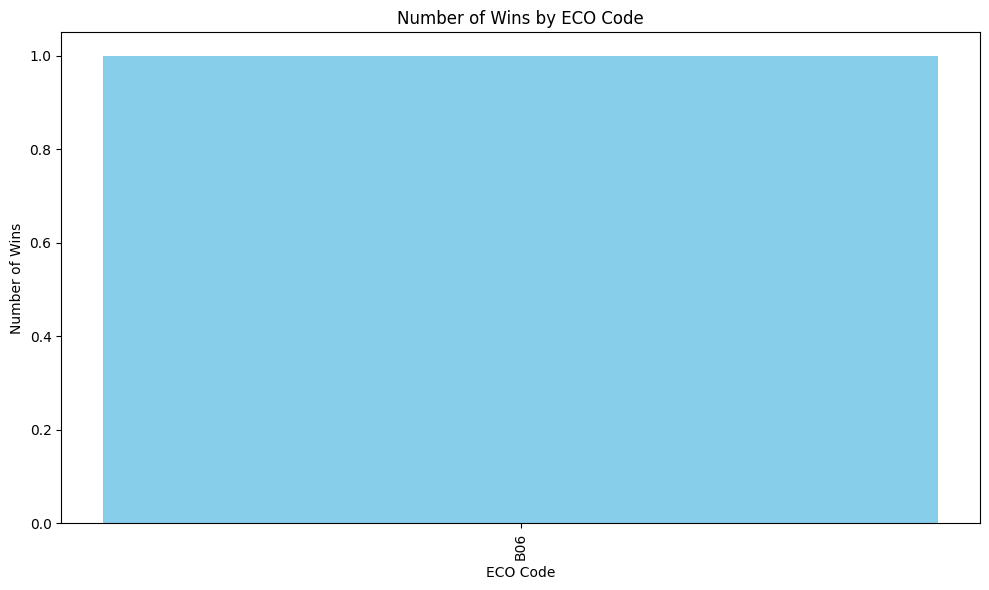

In [13]:
wins_per_eco = {eco: sum(1 for result in results if result == 1.0) for eco, results in mag_games.items()}


import matplotlib.pyplot as plt

# Extracting ECO codes and the corresponding number of wins
eco_codes = list(wins_per_eco.keys())
wins = list(wins_per_eco.values())

# Creating the bar chart
plt.figure(figsize=(10, 6))  # Adjust the figure size as necessary
plt.bar(eco_codes, wins, color='skyblue')  # You can change the color

plt.xlabel('ECO Code')
plt.ylabel('Number of Wins')
plt.title('Number of Wins by ECO Code')
plt.xticks(rotation=90)  # Rotate the ECO codes on the x-axis for better readability

# Display the plot
plt.tight_layout()  # Adjust layout to not cut off labels
plt.show()
